# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

## Setting Up Path/DF and Cleaning:

In [2]:
path = r'C:\Users\steve\Documents\Machine_Learning_CF\Data_Set'

In [3]:
# Creating a dataframe for the pleasant day csv.
df_answers=pd.read_csv(os.path.join(path,'dataset_answers.csv'))

In [4]:
# Creating a dataframe for the weather station data.
df=pd.read_csv(os.path.join(path, 'weather_scaled.csv'))

In [5]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [6]:
# Creating a list of columns to drop, due to there not being enough data.
columns_to_drop = ['DATE', 'MONTH','TOURS_wind_speed', 'TOURS_humidity',
                   'TOURS_pressure', 'TOURS_global_radiation',
                   'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
                   'TOURS_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed',
                   'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine',
                   'ROMA_temp_mean', 'GDANSK_cloud_cover', 'GDANSK_humidity',
                   'GDANSK_precipitation', 'GDANSK_snow_depth','GDANSK_temp_mean',
                   'GDANSK_temp_min','GDANSK_temp_max']

In [7]:
# Dropping the columns for the bases that lack data.
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
# Saving the file without the dropped columns for future use.
df.to_csv(os.path.join(path,'weather_scaled_dropped.csv'))

In [9]:
# Dropping DATE from the pleasant day dataframe.
columns_to_drop_2 = ['DATE']

In [10]:
# Dropping the DATE column.
df_answers.drop(columns=columns_to_drop_2, inplace=True)

In [11]:
df_answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Running K-NN Analysis:

In [12]:
X = df
y = df_answers

In [13]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
X_test

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
19955,0.244897,-0.846921,-0.709631,-0.185357,-0.220423,-0.445514,-0.179228,-0.114186,0.639313,0.687155,...,-0.443701,-0.081896,-0.003958,1.055038,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
7729,1.076130,-0.027930,-0.077272,-0.766151,-1.176243,1.117661,-0.179228,-1.065304,-1.248398,-0.998933,...,-0.443701,0.199321,-2.800617,-0.523673,1.757911,-0.024706,-0.709142,-1.479353,-1.257587,-1.471186
10815,0.244897,-0.027930,-0.257946,-0.888424,0.638741,-0.445514,-0.179228,-0.206978,1.331927,1.453558,...,0.783085,0.199321,-0.954822,1.161071,-0.407962,-0.024706,0.522326,1.765200,1.967062,1.318337
3125,-0.586336,-0.027930,-0.890305,-0.001949,1.347552,-0.445514,-0.179228,0.813735,0.680055,0.058704,...,0.783085,0.621146,1.226572,1.078601,-0.490810,-0.024706,-0.048354,1.254484,1.092581,1.260821
18985,-0.170720,2.156045,0.374412,1.786286,-1.197722,-0.425473,-0.179228,-1.042106,-0.827397,-0.922292,...,-0.443701,-0.081896,-0.003958,-0.994929,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,-0.170720,0.654562,0.374412,-0.338198,-0.048590,-0.445514,-0.179228,0.651349,0.476345,0.472562,...,-0.443701,-0.081896,-0.003958,-0.570798,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
7946,1.076130,-0.027930,1.187444,-2.569670,-1.186982,1.298027,-0.179228,-1.065304,0.014603,0.211985,...,0.169692,-0.081896,-1.691276,-0.723957,0.018111,-0.024706,-1.039536,-0.728299,-0.765691,-0.579689
3579,0.244897,-0.027930,-0.167609,-0.001949,-0.241902,-0.445514,-0.179228,0.187388,-0.216268,-0.063920,...,0.783085,1.042971,-0.731090,-0.641487,-0.289609,-0.024706,-0.859321,0.863935,0.764650,0.886967
14681,0.244897,-0.027930,-0.980642,0.960947,0.091024,-0.445514,-0.179228,0.535359,-0.148365,-0.416466,...,0.169692,0.761754,1.375727,0.100743,-0.490810,-0.024706,0.642469,-0.427878,-0.410433,-0.378383


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [17]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

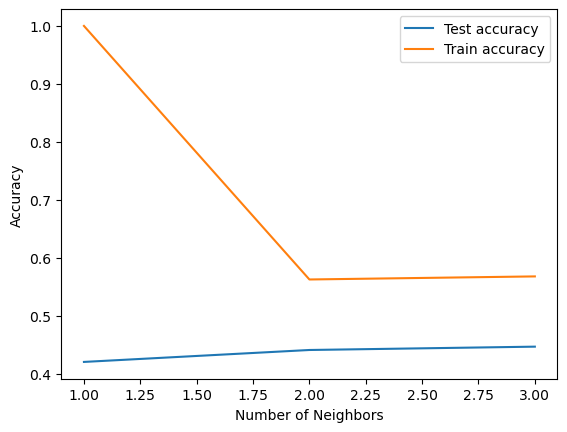

In [18]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

## Creating Confusion Matrix:

In [19]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

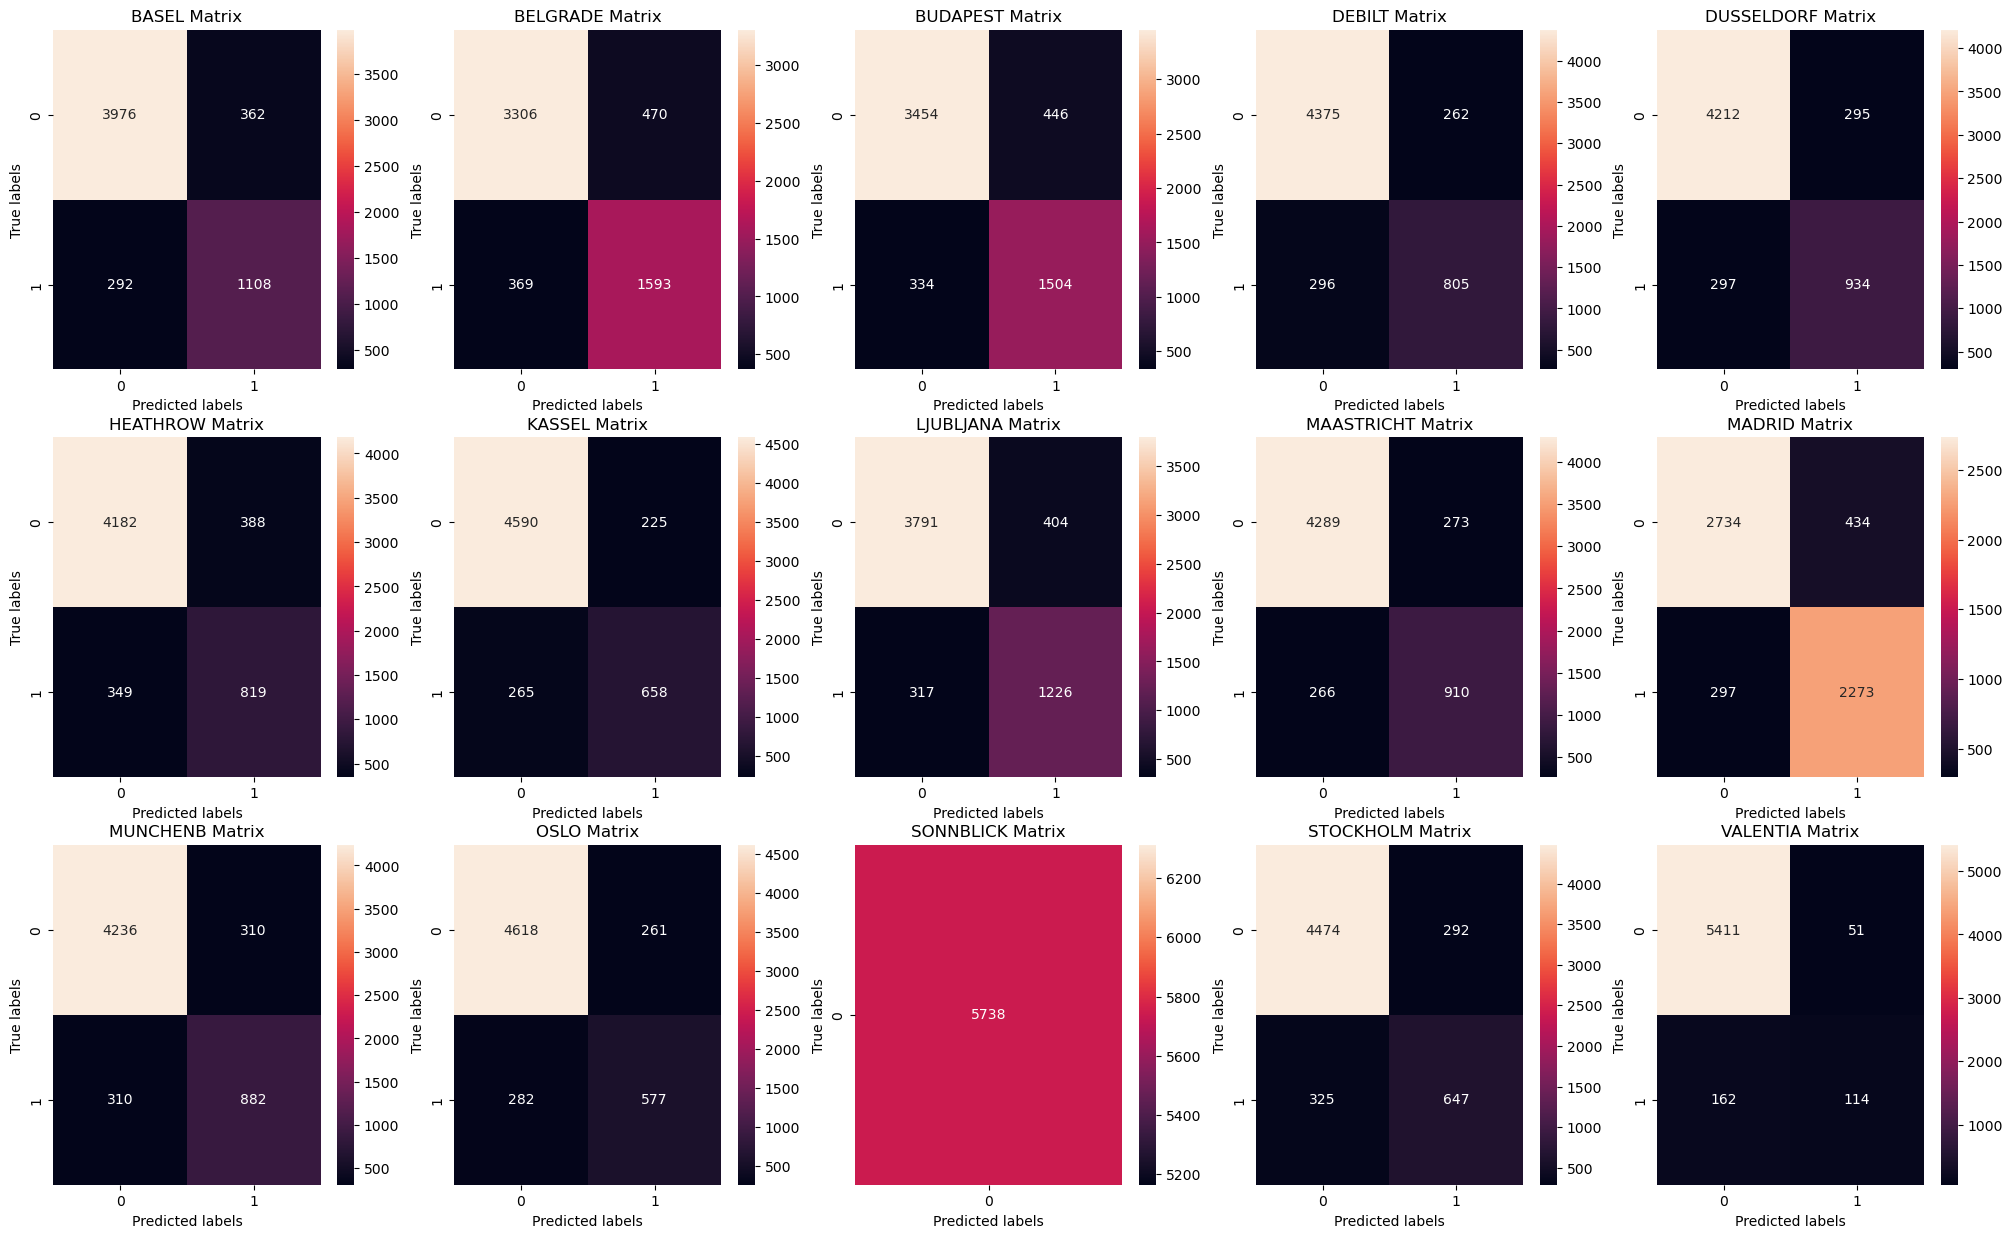

In [20]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1